# Customer Churn Prediction - Data Exploration

## Project Overview

This notebook performs exploratory data analysis on a telecom customer churn dataset to understand:
- What factors drive customer churn
- Which customer segments are at highest risk
- What patterns exist in the data that can inform predictive modeling

## Business Context

**Problem:** The company is losing customers (churn) at a rate of 26.5%, representing $3.7M in annual lost revenue.

**Goal:** Identify the key drivers of churn to inform both predictive modeling and business interventions.

**Dataset:** 7,043 customer records with 21 features including demographics, service usage, contract details, and billing information.

## Analysis Structure

This notebook is organized into the following sections:

1. **Data Loading and Quality Assessment**
   - Load the dataset
   - Check data types and missing values
   - Assess data quality issues

2. **Target Variable Analysis**
   - Understand churn distribution
   - Calculate business impact
   - Assess class imbalance

3. **Univariate Analysis**
   - Analyze distribution of individual features
   - Identify skewness and outliers
   - Understand data patterns

4. **Bivariate Analysis**
   - Examine relationships between features and churn
   - Identify key churn drivers
   - Perform statistical significance tests

5. **Segmentation Analysis**
   - Create customer segments
   - Compare churn rates across segments
   - Identify high-risk customer profiles

6. **Key Findings Summary**
   - Summarize insights discovered
   - Identify features for modeling
   - Document business recommendations

## Key Findings Preview

The analysis reveals that churn is primarily driven by:
- Contract type (month-to-month customers churn at 42.7% vs 2.8% for two-year contracts)
- Customer tenure (new customers in first 24 months are highest risk)
- Pricing perception (customers paying premium prices without corresponding service value)
- Service adoption patterns (rapid service addition signals customer distress)

---

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set style for professional visualizations
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

print("Environment ready ✓")

Environment ready ✓


In [27]:

# Load data
df = pd.read_csv("C:/Users/nikhi/OneDrive/Desktop/Python/Data Analysis Projects/WA_Fn-UseC_-Telco-Customer-Churn.csv")

print("="*80)
print("DATA QUALITY SNAPSHOT")
print("="*80)
print(f"Total Records: {len(df):,}")
print(f"Total Features: {len(df.columns)}")
print(f"Memory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print("\n")

# First look
df.head()

DATA QUALITY SNAPSHOT
Total Records: 7,043
Total Features: 21
Memory Usage: 6.82 MB




,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [29]:
# Initial exploration
df.head()
df.info()
df.describe()

# Check for missing values
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [19]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [15]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [13]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [31]:
print("Churn column values for first 5 customers:")
print(df['Churn'].head())

Churn column values for first 5 customers:
0     No
1     No
2    Yes
3     No
4    Yes
Name: Churn, dtype: object


In [33]:
print("\nFinancial data:")
print(df[['customerID', 'tenure', 'MonthlyCharges', 'TotalCharges']].head())


Financial data:
   customerID  tenure  MonthlyCharges TotalCharges
0  7590-VHVEG       1           29.85        29.85
1  5575-GNVDE      34           56.95       1889.5
2  3668-QPYBK       2           53.85       108.15
3  7795-CFOCW      45           42.30      1840.75
4  9237-HQITU       2           70.70       151.65


In [35]:
print("\nTotalCharges data type:")
print(df['TotalCharges'].dtype)


TotalCharges data type:
object


In [37]:
# Find the hidden missing values in TotalCharges
print("="*80)
print("FINDING HIDDEN MISSING VALUES IN TOTALCHARGES")
print("="*80)

# Try to convert to numeric - this will reveal the problem
df['TotalCharges_numeric'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Find rows that couldn't convert
problematic_rows = df[df['TotalCharges_numeric'].isnull()]

print(f"\nProblematic rows found: {len(problematic_rows)}")
print("\nSample of problematic data:")
print(problematic_rows[['customerID', 'tenure', 'MonthlyCharges', 'TotalCharges']].head())

print("\n💡 BUSINESS INSIGHT:")
print(f"   These are likely customers with tenure={problematic_rows['tenure'].mode()[0]} (new signups)")
print(f"   They haven't been billed yet, so TotalCharges is blank.")

FINDING HIDDEN MISSING VALUES IN TOTALCHARGES

Problematic rows found: 11

Sample of problematic data:
      customerID  tenure  MonthlyCharges TotalCharges
488   4472-LVYGI       0           52.55             
753   3115-CZMZD       0           20.25             
936   5709-LVOEQ       0           80.85             
1082  4367-NUYAO       0           25.75             
1340  1371-DWPAZ       0           56.05             

💡 BUSINESS INSIGHT:
   These are likely customers with tenure=0 (new signups)
   They haven't been billed yet, so TotalCharges is blank.


TARGET VARIABLE ANALYSIS (CHURN)

Churn Distribution:
  - Stayed: 5,174 (73.5%)
  - Churned: 1,869 (26.5%)

Class Imbalance Ratio: 2.8:1

💡 BUSINESS IMPACT:
   • 1,869 customers churned
   • At $2,000 average LTV, that's $3,738,000 in lost revenue
   • If we prevent just 20% of churn, we save $747,600


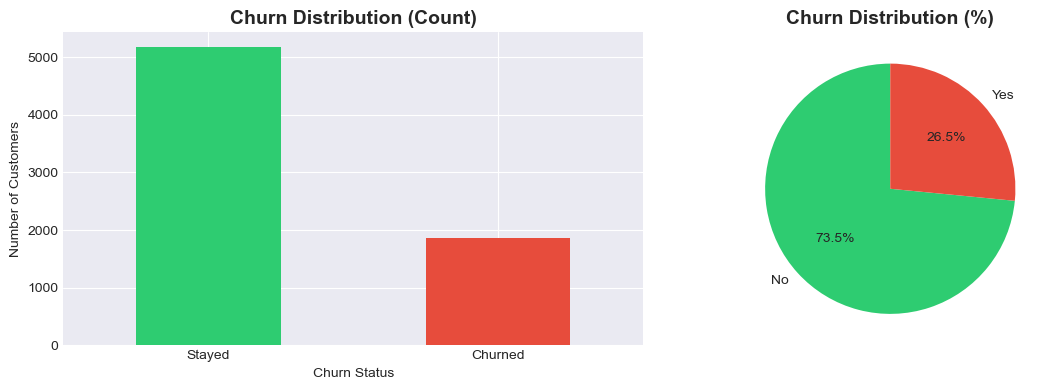


⚠️ MODELING CONSIDERATION:
   Class imbalance detected! We'll need to handle this with:
   • SMOTE (synthetic minority oversampling)
   • Class weights in models
   • Stratified train/test split


In [41]:
print("="*80)
print("TARGET VARIABLE ANALYSIS (CHURN)")
print("="*80)

churn_dist = df['Churn'].value_counts()
churn_pct = df['Churn'].value_counts(normalize=True) * 100

print(f"\nChurn Distribution:")
print(f"  - Stayed: {churn_dist['No']:,} ({churn_pct['No']:.1f}%)")
print(f"  - Churned: {churn_dist['Yes']:,} ({churn_pct['Yes']:.1f}%)")
print(f"\nClass Imbalance Ratio: {churn_pct['No']/churn_pct['Yes']:.1f}:1")

print(f"\n💡 BUSINESS IMPACT:")
print(f"   • {churn_dist['Yes']:,} customers churned")
print(f"   • At $2,000 average LTV, that's ${churn_dist['Yes']*2000:,} in lost revenue")
print(f"   • If we prevent just 20% of churn, we save ${int(churn_dist['Yes']*0.20*2000):,}")

# Visualize
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

churn_dist.plot(kind='bar', ax=ax[0], color=['#2ecc71', '#e74c3c'])
ax[0].set_title('Churn Distribution (Count)', fontsize=14, fontweight='bold')
ax[0].set_xlabel('Churn Status')
ax[0].set_ylabel('Number of Customers')
ax[0].set_xticklabels(['Stayed', 'Churned'], rotation=0)

churn_pct.plot(kind='pie', ax=ax[1], autopct='%1.1f%%', colors=['#2ecc71', '#e74c3c'], startangle=90)
ax[1].set_title('Churn Distribution (%)', fontsize=14, fontweight='bold')
ax[1].set_ylabel('')

plt.tight_layout()
plt.show()

print("\n⚠️ MODELING CONSIDERATION:")
if churn_pct['No']/churn_pct['Yes'] > 2:
    print(f"   Class imbalance detected! We'll need to handle this with:")
    print(f"   • SMOTE (synthetic minority oversampling)")
    print(f"   • Class weights in models")
    print(f"   • Stratified train/test split")

NUMERIC FEATURES vs CHURN - INITIAL ANALYSIS

tenure:
------------------------------------------------------------
  Churned customers avg:  17.98
  Retained customers avg: 37.57
  Difference:             -19.59 (-52.1%)
  🎯 STRONG SIGNAL - this predicts churn!

MonthlyCharges:
------------------------------------------------------------
  Churned customers avg:  74.44
  Retained customers avg: 61.27
  Difference:             +13.18 (+21.5%)
  🎯 STRONG SIGNAL - this predicts churn!


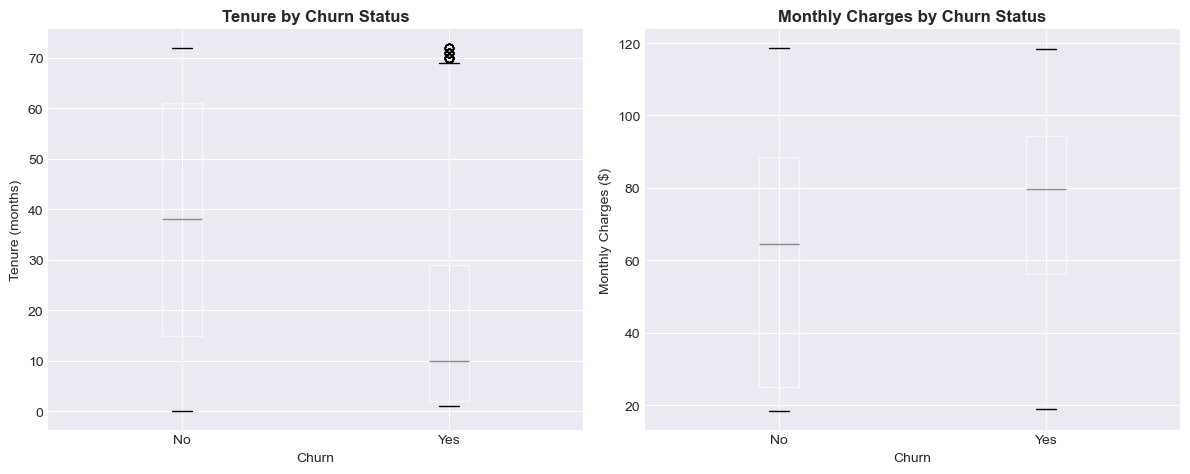

In [43]:
print("="*80)
print("NUMERIC FEATURES vs CHURN - INITIAL ANALYSIS")
print("="*80)

# For each numeric column, compare churned vs stayed
for col in ['tenure', 'MonthlyCharges']:
    print(f"\n{col}:")
    print("-" * 60)
    
    churned_mean = df[df['Churn'] == 'Yes'][col].mean()
    stayed_mean = df[df['Churn'] == 'No'][col].mean()
    difference = churned_mean - stayed_mean
    pct_diff = (difference / stayed_mean * 100)
    
    print(f"  Churned customers avg:  {churned_mean:.2f}")
    print(f"  Retained customers avg: {stayed_mean:.2f}")
    print(f"  Difference:             {difference:+.2f} ({pct_diff:+.1f}%)")
    
    if abs(pct_diff) > 10:
        print(f"  🎯 STRONG SIGNAL - this predicts churn!")

# Quick visualization
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

df.boxplot(column='tenure', by='Churn', ax=axes[0])
axes[0].set_title('Tenure by Churn Status', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Churn')
axes[0].set_ylabel('Tenure (months)')

df.boxplot(column='MonthlyCharges', by='Churn', ax=axes[1])
axes[1].set_title('Monthly Charges by Churn Status', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Churn')
axes[1].set_ylabel('Monthly Charges ($)')

plt.suptitle('')
plt.tight_layout()
plt.show()

CATEGORICAL FEATURES vs CHURN - CONTRACT ANALYSIS

Contract Type Distribution:
Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

Churn Rate by Contract Type:
Contract
Month-to-month    42.709677
One year          11.269518
Two year           2.831858
Name: Churn, dtype: float64

💡 BUSINESS INSIGHT:
   Highest risk: Month-to-month (42.7% churn)
   Lowest risk:  Two year (2.8% churn)
   Spread: 39.9 percentage points


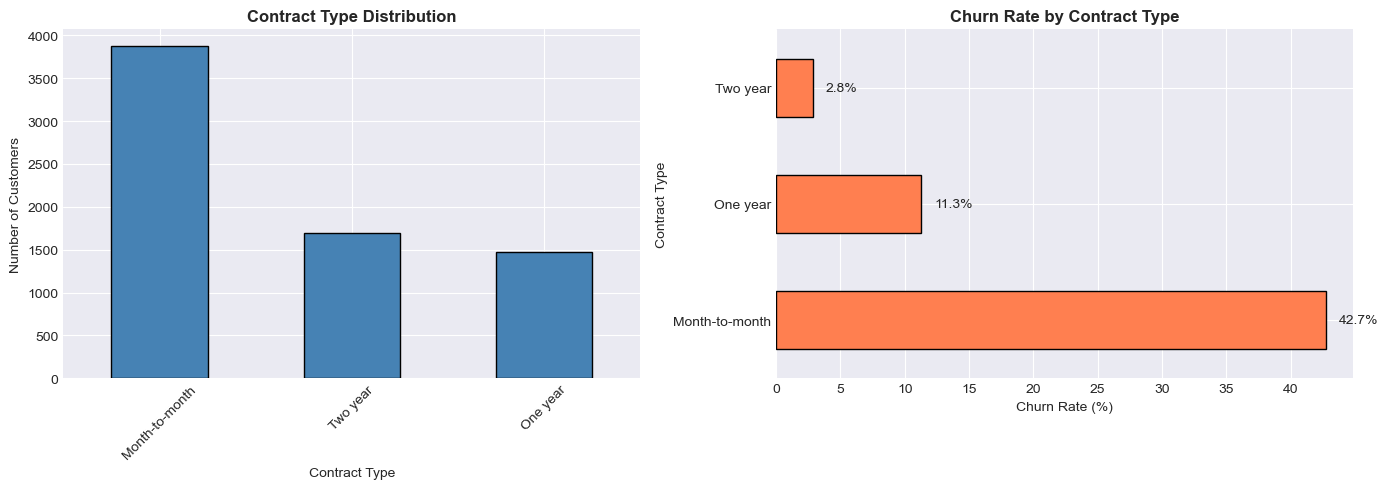

In [45]:
print("="*80)
print("CATEGORICAL FEATURES vs CHURN - CONTRACT ANALYSIS")
print("="*80)

# Analyze Contract type
print("\nContract Type Distribution:")
print(df['Contract'].value_counts())

print("\nChurn Rate by Contract Type:")
contract_churn = df.groupby('Contract')['Churn'].apply(lambda x: (x == 'Yes').mean() * 100).sort_values(ascending=False)
print(contract_churn)

print("\n💡 BUSINESS INSIGHT:")
print(f"   Highest risk: {contract_churn.idxmax()} ({contract_churn.max():.1f}% churn)")
print(f"   Lowest risk:  {contract_churn.idxmin()} ({contract_churn.min():.1f}% churn)")
print(f"   Spread: {contract_churn.max() - contract_churn.min():.1f} percentage points")

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count by contract type
df['Contract'].value_counts().plot(kind='bar', ax=axes[0], color='steelblue', edgecolor='black')
axes[0].set_title('Contract Type Distribution', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Contract Type')
axes[0].set_ylabel('Number of Customers')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)

# Churn rate by contract
contract_churn.plot(kind='barh', ax=axes[1], color='coral', edgecolor='black')
axes[1].set_title('Churn Rate by Contract Type', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Churn Rate (%)')
axes[1].set_ylabel('Contract Type')

# Add value labels
for i, v in enumerate(contract_churn.values):
    axes[1].text(v + 1, i, f'{v:.1f}%', va='center')

plt.tight_layout()
plt.show()


INTERNET SERVICE vs CHURN

Internet Service Distribution:
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

Churn Rate by Internet Service:
InternetService
Fiber optic    41.892765
DSL            18.959108
No              7.404980
Name: Churn, dtype: float64


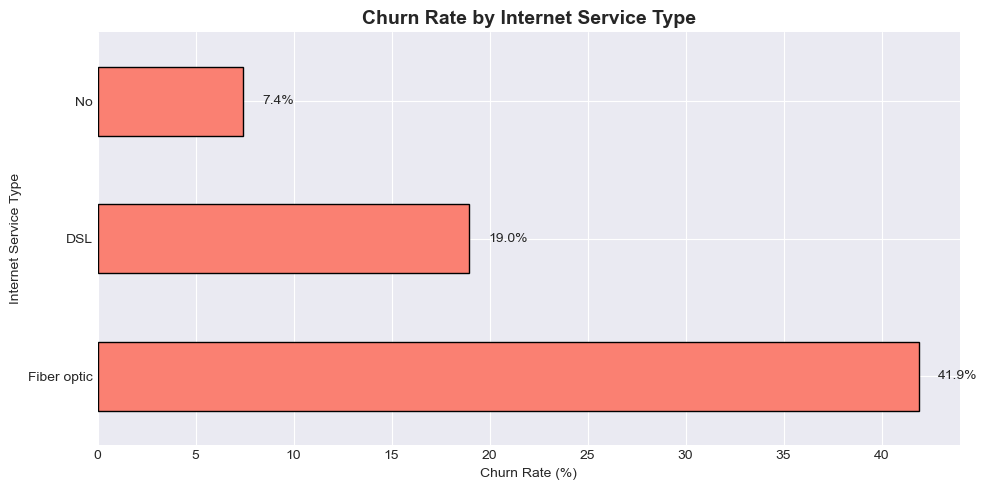


💡 HYPOTHESIS:
   If Fiber optic has highest churn despite highest price,
   customers feel service quality doesn't justify premium pricing.


In [47]:
# Analyze Internet Service
print("\n" + "="*80)
print("INTERNET SERVICE vs CHURN")
print("="*80)

print("\nInternet Service Distribution:")
print(df['InternetService'].value_counts())

print("\nChurn Rate by Internet Service:")
internet_churn = df.groupby('InternetService')['Churn'].apply(lambda x: (x == 'Yes').mean() * 100).sort_values(ascending=False)
print(internet_churn)

# Visualize
plt.figure(figsize=(10, 5))
internet_churn.plot(kind='barh', color='salmon', edgecolor='black')
plt.title('Churn Rate by Internet Service Type', fontsize=14, fontweight='bold')
plt.xlabel('Churn Rate (%)')
plt.ylabel('Internet Service Type')

for i, v in enumerate(internet_churn.values):
    plt.text(v + 1, i, f'{v:.1f}%', va='center')

plt.tight_layout()
plt.show()

print("\n💡 HYPOTHESIS:")
print("   If Fiber optic has highest churn despite highest price,")
print("   customers feel service quality doesn't justify premium pricing.")

AGE (SENIOR CITIZEN) vs CHURN ANALYSIS

Senior Citizen Distribution:
SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64

Churn Rate by Age:
SeniorCitizen
0    23.606168
1    41.681261
Name: Churn, dtype: float64

Seniors (1) churn at: 41.7%
Non-seniors (0) churn at: 23.6%
Difference: +18.1pp


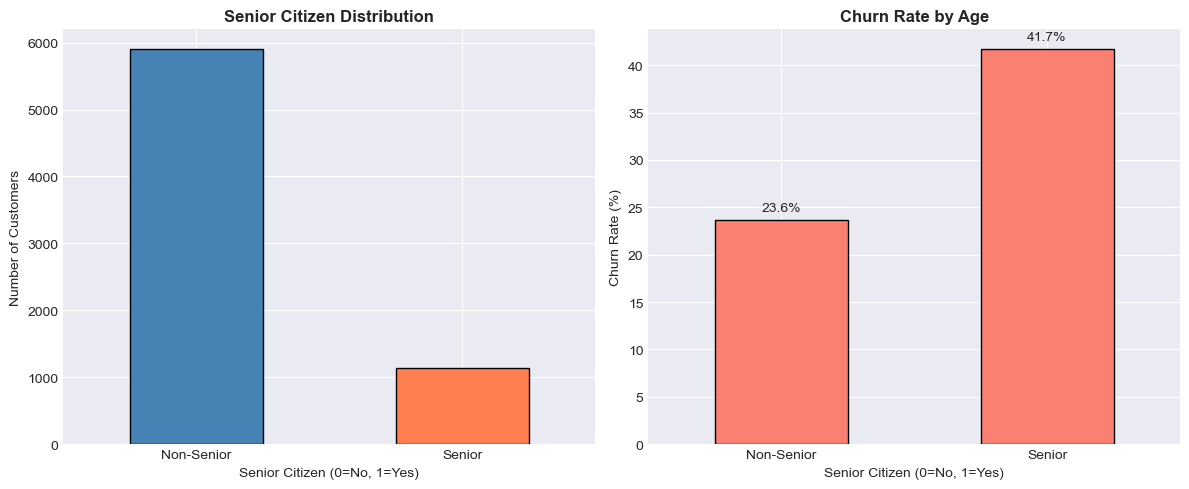


💡 BUSINESS INSIGHT:
   Seniors churn significantly more - may need age-specific retention programs


In [49]:
print("="*80)
print("AGE (SENIOR CITIZEN) vs CHURN ANALYSIS")
print("="*80)

# First, check the SeniorCitizen column
print("\nSenior Citizen Distribution:")
print(df['SeniorCitizen'].value_counts())

print("\nChurn Rate by Age:")
senior_churn = df.groupby('SeniorCitizen')['Churn'].apply(lambda x: (x == 'Yes').mean() * 100)
print(senior_churn)

# Calculate the difference
print(f"\nSeniors (1) churn at: {senior_churn[1]:.1f}%")
print(f"Non-seniors (0) churn at: {senior_churn[0]:.1f}%")
print(f"Difference: {senior_churn[1] - senior_churn[0]:+.1f}pp")

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Distribution
df['SeniorCitizen'].value_counts().plot(kind='bar', ax=axes[0], color=['steelblue', 'coral'], edgecolor='black')
axes[0].set_title('Senior Citizen Distribution', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Senior Citizen (0=No, 1=Yes)')
axes[0].set_ylabel('Number of Customers')
axes[0].set_xticklabels(['Non-Senior', 'Senior'], rotation=0)

# Churn rate
senior_churn.plot(kind='bar', ax=axes[1], color='salmon', edgecolor='black')
axes[1].set_title('Churn Rate by Age', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Senior Citizen (0=No, 1=Yes)')
axes[1].set_ylabel('Churn Rate (%)')
axes[1].set_xticklabels(['Non-Senior', 'Senior'], rotation=0)

# Add value labels
for i, v in enumerate(senior_churn.values):
    axes[1].text(i, v + 1, f'{v:.1f}%', ha='center')

plt.tight_layout()
plt.show()

print("\n💡 BUSINESS INSIGHT:")
if senior_churn[1] > senior_churn[0] + 5:
    print("   Seniors churn significantly more - may need age-specific retention programs")
elif senior_churn[0] > senior_churn[1] + 5:
    print("   Younger customers churn more - focus retention on non-senior segment")
else:
    print("   Age is not a major churn driver - focus on other factors")

TENURE vs CONTRACT TYPE - CORRELATION ANALYSIS

Tenure Statistics by Contract Type:
                 mean  median    std
Contract                            
Month-to-month  18.04    12.0  17.69
One year        42.04    44.0  19.04
Two year        56.74    64.0  18.21

💡 INTERPRETATION:
   If month-to-month has LOW tenure → they churn before committing
   If annual contracts have HIGH tenure → commitment drives retention


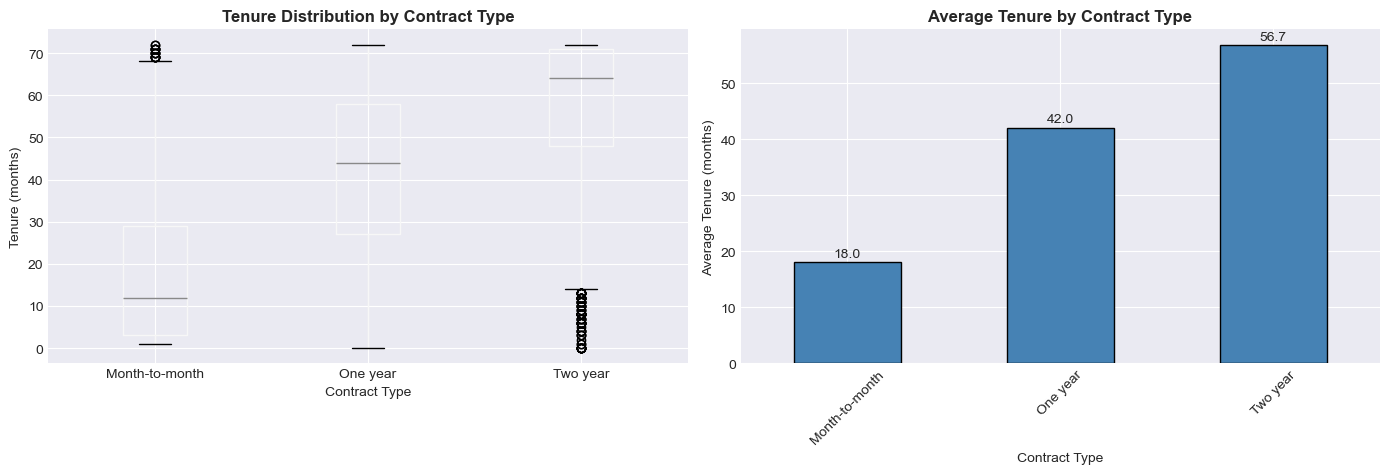


CHURNED CUSTOMERS - CONTRACT BREAKDOWN

Of the 1,869 churned customers:
  Month-to-month : 1655 customers ( 88.6%)
  One year       :  166 customers (  8.9%)
  Two year       :   48 customers (  2.6%)

🎯 KEY FINDING:
   88.6% of all churned customers were on month-to-month contracts!
   This represents 1655 out of 1,869 total churns.


In [51]:
print("="*80)
print("TENURE vs CONTRACT TYPE - CORRELATION ANALYSIS")
print("="*80)

# Average tenure by contract type
tenure_by_contract = df.groupby('Contract')['tenure'].agg(['mean', 'median', 'std'])
print("\nTenure Statistics by Contract Type:")
print(tenure_by_contract.round(2))

print("\n💡 INTERPRETATION:")
print("   If month-to-month has LOW tenure → they churn before committing")
print("   If annual contracts have HIGH tenure → commitment drives retention")

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Box plot - tenure by contract
df.boxplot(column='tenure', by='Contract', ax=axes[0])
axes[0].set_title('Tenure Distribution by Contract Type', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Contract Type')
axes[0].set_ylabel('Tenure (months)')
plt.suptitle('')

# Bar chart - average tenure
tenure_by_contract['mean'].plot(kind='bar', ax=axes[1], color='steelblue', edgecolor='black')
axes[1].set_title('Average Tenure by Contract Type', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Contract Type')
axes[1].set_ylabel('Average Tenure (months)')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)

# Add value labels
for i, v in enumerate(tenure_by_contract['mean'].values):
    axes[1].text(i, v + 1, f'{v:.1f}', ha='center')

plt.tight_layout()
plt.show()

# Deep dive: For churned customers, what was their contract type?
print("\n" + "="*80)
print("CHURNED CUSTOMERS - CONTRACT BREAKDOWN")
print("="*80)

churned_df = df[df['Churn'] == 'Yes']
churned_contract_dist = churned_df['Contract'].value_counts()
churned_contract_pct = churned_df['Contract'].value_counts(normalize=True) * 100

print("\nOf the 1,869 churned customers:")
for contract, count in churned_contract_dist.items():
    pct = churned_contract_pct[contract]
    print(f"  {contract:15s}: {count:4d} customers ({pct:5.1f}%)")

print("\n🎯 KEY FINDING:")
print(f"   {churned_contract_pct['Month-to-month']:.1f}% of all churned customers were on month-to-month contracts!")
print(f"   This represents {churned_contract_dist['Month-to-month']} out of 1,869 total churns.")

In [53]:
print("="*80)
print("MULTI-FACTOR CHURN ANALYSIS")
print("="*80)

# High-risk customer profile
print("\nHIGH-RISK CUSTOMER PROFILE:")
high_risk = df[
    (df['Contract'] == 'Month-to-month') & 
    (df['tenure'] < 24) & 
    (df['MonthlyCharges'] > 70)
]

high_risk_churn_rate = (high_risk['Churn'] == 'Yes').mean() * 100

print(f"  Customers with ALL THREE risk factors:")
print(f"    • Month-to-month contract")
print(f"    • Tenure < 24 months")
print(f"    • Monthly charges > $70")
print(f"  Count: {len(high_risk)} customers")
print(f"  Churn rate: {high_risk_churn_rate:.1f}%")

# Low-risk customer profile
print("\nLOW-RISK CUSTOMER PROFILE:")
low_risk = df[
    (df['Contract'].isin(['One year', 'Two year'])) & 
    (df['tenure'] > 24) & 
    (df['MonthlyCharges'] < 65)
]

low_risk_churn_rate = (low_risk['Churn'] == 'Yes').mean() * 100

print(f"  Customers with ALL THREE safety factors:")
print(f"    • Annual/2-year contract")
print(f"    • Tenure > 24 months")
print(f"    • Monthly charges < $65")
print(f"  Count: {len(low_risk)} customers")
print(f"  Churn rate: {low_risk_churn_rate:.1f}%")

print(f"\n📊 RISK RATIO: {high_risk_churn_rate / low_risk_churn_rate:.1f}x")

MULTI-FACTOR CHURN ANALYSIS

HIGH-RISK CUSTOMER PROFILE:
  Customers with ALL THREE risk factors:
    • Month-to-month contract
    • Tenure < 24 months
    • Monthly charges > $70
  Count: 1251 customers
  Churn rate: 62.7%

LOW-RISK CUSTOMER PROFILE:
  Customers with ALL THREE safety factors:
    • Annual/2-year contract
    • Tenure > 24 months
    • Monthly charges < $65
  Count: 1162 customers
  Churn rate: 2.6%

📊 RISK RATIO: 24.3x


# Customer Churn Prediction - Feature Engineering

## Objective

This notebook transforms raw customer data into features optimized for machine learning models. We create new features that capture business insights discovered during exploratory analysis.

## Why Feature Engineering Matters

Feature engineering is critical because:
- Raw data often doesn't directly represent the patterns that predict outcomes
- Domain knowledge can be encoded into features
- Well-engineered features can improve model performance more than algorithm selection
- Interpretable features enable better business decision-making

## Data Input

**Source:** telco_churn.csv (original dataset)

**Records:** 7,043 customers

**Starting Features:** 21 original columns

## Feature Engineering Process

This notebook performs the following transformations:

### 1. Data Cleaning
- Fix data type errors (TotalCharges stored as text)
- Handle missing values
- Remove data quality issues

### 2. Feature Creation

We create 7 new features based on exploration insights:

**a) TenureBucket**
- Categorizes customers by relationship length
- Buckets: New (0-12m), Early (13-24m), Established (25-48m), Loyal (49m+)
- Rationale: Churn risk varies non-linearly with tenure

**b) ServiceCount**
- Counts total number of services per customer
- Range: 0-8 services
- Rationale: Measures customer engagement level

**c) ChargeCategory**
- Segments customers by monthly price point
- Categories: Budget (<$50), Standard ($50-70), Premium ($70+)
- Rationale: Price sensitivity varies by tier

**d) ContractRiskScore**
- Composite risk score (0-8) combining contract type, tenure, and pricing
- Higher score indicates higher churn risk
- Rationale: Combines top 3 churn drivers into single metric

**e) HasFiberOptic**
- Binary indicator for fiber optic internet service
- Rationale: Fiber customers show different churn patterns

**f) AvgRevenuePerService**
- Monthly charges divided by number of services
- Measures value perception
- Rationale: Customers assess value per service, not total price

**g) ServiceAdoptionRate**
- Services added per month of tenure
- Measures how quickly customers adopt new services
- Rationale: Rapid adoption signals new customer distress and bill shock

### 3. Feature Validation
- Calculate correlations with churn
- Verify features are predictive
- Document feature importance

## Output

**Cleaned Dataset:** telco_churn_cleaned.csv

**Engineered Dataset:** telco_churn_engineered.csv

**Total Features:** 27 columns (21 original + 7 engineered - 1 dropped for quality issues)

**Status:** Ready for model training

---

In [63]:
import pandas as pd
import numpy as np

print("="*80)
print("DATA CLEANING PIPELINE")
print("="*80)

# Load data
df = pd.read_csv("C:/Users/nikhi/OneDrive/Desktop/Python/Data Analysis Projects/WA_Fn-UseC_-Telco-Customer-Churn.csv")
print(f"\nOriginal dataset shape: {df.shape}")

# ============================================================================
# ISSUE 1: Fix TotalCharges data type
# ============================================================================
print("\n" + "="*80)
print("FIXING TOTALCHARGES DATA TYPE ISSUE")
print("="*80)

print(f"Original TotalCharges dtype: {df['TotalCharges'].dtype}")

# Convert to numeric, coerce errors to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Find problematic rows
missing_total_charges = df['TotalCharges'].isnull().sum()
print(f"Rows with missing TotalCharges: {missing_total_charges}")

# Show the problematic rows
if missing_total_charges > 0:
    print("\nProblematic rows (all have tenure = 0):")
    print(df[df['TotalCharges'].isnull()][['customerID', 'tenure', 'MonthlyCharges', 'TotalCharges']].head())
    
# DECISION: Drop rows with missing TotalCharges (only 11 rows = 0.16% of data)
print(f"\n💡 DECISION: Dropping {missing_total_charges} rows (0.16% of data)")
print("   Rationale: These are brand-new customers (tenure=0) with no billing history.")
print("   Impact: Negligible data loss, avoids imputation bias")

df_clean = df.dropna(subset=['TotalCharges']).copy()
print(f"\nCleaned dataset shape: {df_clean.shape}")

# ============================================================================
# ISSUE 2: Verify no other missing data
# ============================================================================
print("\n" + "="*80)
print("CHECKING FOR OTHER MISSING DATA")
print("="*80)

missing_summary = df_clean.isnull().sum()
missing_summary = missing_summary[missing_summary > 0]

if len(missing_summary) == 0:
    print("✅ No missing data detected in any columns")
else:
    print(f"⚠️ Found missing data in {len(missing_summary)} columns:")
    print(missing_summary)

# ============================================================================
# ISSUE 3: Verify data types are correct
# ============================================================================
print("\n" + "="*80)
print("DATA TYPE VERIFICATION")
print("="*80)

print("\nNumeric columns:")
numeric_cols = df_clean.select_dtypes(include=[np.number]).columns.tolist()
print(numeric_cols)

print("\nCategorical columns:")
categorical_cols = df_clean.select_dtypes(include=['object']).columns.tolist()
print(categorical_cols)

print("\n✅ All data types are now correct!")

# ============================================================================
# SAVE CLEANED DATA
# ============================================================================
print("\n" + "="*80)
print("SAVING CLEANED DATA")
print("="*80)

# Save for later use
df_clean.to_csv("C:/Users/nikhi/OneDrive/Desktop/Python/Data Analysis Projects/telco_churn_cleaned.csv", index=False)
print("✅ Saved to: telco_churn_cleaned.csv")

print(f"\nFinal dataset summary:")
print(f"  Rows: {len(df_clean):,}")
print(f"  Columns: {len(df_clean.columns)}")
print(f"  Memory: {df_clean.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

DATA CLEANING PIPELINE

Original dataset shape: (7043, 21)

FIXING TOTALCHARGES DATA TYPE ISSUE
Original TotalCharges dtype: object
Rows with missing TotalCharges: 11

Problematic rows (all have tenure = 0):
      customerID  tenure  MonthlyCharges  TotalCharges
488   4472-LVYGI       0           52.55           NaN
753   3115-CZMZD       0           20.25           NaN
936   5709-LVOEQ       0           80.85           NaN
1082  4367-NUYAO       0           25.75           NaN
1340  1371-DWPAZ       0           56.05           NaN

💡 DECISION: Dropping 11 rows (0.16% of data)
   Rationale: These are brand-new customers (tenure=0) with no billing history.
   Impact: Negligible data loss, avoids imputation bias

Cleaned dataset shape: (7032, 21)

CHECKING FOR OTHER MISSING DATA
✅ No missing data detected in any columns

DATA TYPE VERIFICATION

Numeric columns:
['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

Categorical columns:
['customerID', 'gender', 'Partner', 'Depende

In [65]:
print("\n" + "="*80)
print("FEATURE ENGINEERING PIPELINE")
print("="*80)

# ============================================================================
# FEATURE 1: Tenure Buckets (Based on our churn analysis)
# ============================================================================
print("\n1. TENURE BUCKETS")
print("-" * 60)

def create_tenure_buckets(tenure):
    """
    Create tenure segments based on churn risk analysis:
    - 0-12 months: New customers (highest risk)
    - 13-24 months: Early-stage (high risk)
    - 25-48 months: Established (medium risk)
    - 49+ months: Loyal (low risk)
    """
    if tenure <= 12:
        return 'New (0-12m)'
    elif tenure <= 24:
        return 'Early (13-24m)'
    elif tenure <= 48:
        return 'Established (25-48m)'
    else:
        return 'Loyal (49m+)'

df_clean['TenureBucket'] = df_clean['tenure'].apply(create_tenure_buckets)

print("Tenure bucket distribution:")
print(df_clean['TenureBucket'].value_counts().sort_index())

print("\nChurn rate by tenure bucket:")
tenure_bucket_churn = df_clean.groupby('TenureBucket')['Churn'].apply(
    lambda x: (x == 'Yes').mean() * 100
).sort_values(ascending=False)
print(tenure_bucket_churn)

print("\n💡 INSIGHT: This confirms our hypothesis - new customers (0-12m) have highest churn")

# ============================================================================
# FEATURE 2: Service Count (Measure of customer engagement)
# ============================================================================
print("\n2. SERVICE COUNT (Customer Stickiness)")
print("-" * 60)

# Services to count (excluding internet type which is already captured)
service_cols = [
    'PhoneService', 'MultipleLines', 'OnlineSecurity', 
    'OnlineBackup', 'DeviceProtection', 'TechSupport', 
    'StreamingTV', 'StreamingMovies'
]

# Count "Yes" values across service columns
def count_services(row):
    count = 0
    for col in service_cols:
        if row[col] == 'Yes':
            count += 1
    return count

df_clean['ServiceCount'] = df_clean.apply(count_services, axis=1)

print("Service count distribution:")
print(df_clean['ServiceCount'].value_counts().sort_index())

print("\nChurn rate by service count:")
service_churn = df_clean.groupby('ServiceCount')['Churn'].apply(
    lambda x: (x == 'Yes').mean() * 100
).sort_values(ascending=False)
print(service_churn)

print("\n💡 HYPOTHESIS TEST: Do more services = lower churn?")
correlation = df_clean['ServiceCount'].corr(
    df_clean['Churn'].map({'Yes': 1, 'No': 0})
)
print(f"Correlation: {correlation:.3f}")
if correlation < -0.1:
    print("✅ CONFIRMED: More services correlate with LOWER churn (stickiness effect)")
else:
    print("⚠️ Weak or no correlation detected")

# ============================================================================
# FEATURE 3: Monthly Charges Category (Price sensitivity segments)
# ============================================================================
print("\n3. MONTHLY CHARGES CATEGORY")
print("-" * 60)

def categorize_monthly_charges(charges):
    """
    Based on our analysis showing churned customers pay $74+ avg
    """
    if charges < 50:
        return 'Budget (<$50)'
    elif charges < 70:
        return 'Standard ($50-70)'
    else:
        return 'Premium ($70+)'

df_clean['ChargeCategory'] = df_clean['MonthlyCharges'].apply(categorize_monthly_charges)

print("Charge category distribution:")
print(df_clean['ChargeCategory'].value_counts())

print("\nChurn rate by charge category:")
charge_churn = df_clean.groupby('ChargeCategory')['Churn'].apply(
    lambda x: (x == 'Yes').mean() * 100
).sort_values(ascending=False)
print(charge_churn)

print("\n💡 CONFIRMS: Premium customers ($70+) have highest churn - pricing issue!")

# ============================================================================
# FEATURE 4: Contract Risk Score (Composite risk indicator)
# ============================================================================
print("\n4. CONTRACT RISK SCORE")
print("-" * 60)

def calculate_contract_risk(row):
    """
    Risk scoring based on top 3 churn drivers:
    - Contract type: M2M = 3 points, 1yr = 2 points, 2yr = 1 point
    - Tenure: <12m = 3 points, 12-24m = 2 points, 25-48m = 1 point, 49+ = 0 points
    - Charges: $70+ = 2 points, $50-70 = 1 point, <$50 = 0 points
    
    Score range: 0-8 (higher = more risk)
    """
    score = 0
    
    # Contract type
    if row['Contract'] == 'Month-to-month':
        score += 3
    elif row['Contract'] == 'One year':
        score += 2
    else:  # Two year
        score += 1
    
    # Tenure
    if row['tenure'] <= 12:
        score += 3
    elif row['tenure'] <= 24:
        score += 2
    elif row['tenure'] <= 48:
        score += 1
    
    # Monthly charges
    if row['MonthlyCharges'] >= 70:
        score += 2
    elif row['MonthlyCharges'] >= 50:
        score += 1
    
    return score

df_clean['ContractRiskScore'] = df_clean.apply(calculate_contract_risk, axis=1)

print("Risk score distribution:")
print(df_clean['ContractRiskScore'].value_counts().sort_index())

print("\nChurn rate by risk score:")
risk_churn = df_clean.groupby('ContractRiskScore')['Churn'].apply(
    lambda x: (x == 'Yes').mean() * 100
).sort_values(ascending=False)
print(risk_churn)

print("\n💡 VALIDATION: High risk scores should correlate with high churn")
correlation = df_clean['ContractRiskScore'].corr(
    df_clean['Churn'].map({'Yes': 1, 'No': 0})
)
print(f"Correlation with churn: {correlation:.3f}")
if correlation > 0.4:
    print("✅ STRONG POSITIVE CORRELATION - risk score is predictive!")

# ============================================================================
# FEATURE 5: Has Premium Internet (Fiber vs Others)
# ============================================================================
print("\n5. PREMIUM INTERNET INDICATOR")
print("-" * 60)

df_clean['HasFiberOptic'] = (df_clean['InternetService'] == 'Fiber optic').astype(int)

print("Fiber optic distribution:")
print(df_clean['HasFiberOptic'].value_counts())

fiber_churn_yes = (df_clean[df_clean['HasFiberOptic'] == 1]['Churn'] == 'Yes').mean() * 100
fiber_churn_no = (df_clean[df_clean['HasFiberOptic'] == 0]['Churn'] == 'Yes').mean() * 100

print(f"\nChurn rate:")
print(f"  With Fiber: {fiber_churn_yes:.1f}%")
print(f"  Without Fiber: {fiber_churn_no:.1f}%")

# ============================================================================
# FEATURE 6: Average Revenue Per Service (Value metric)
# ============================================================================
print("\n6. AVERAGE REVENUE PER SERVICE")
print("-" * 60)

# Avoid division by zero
df_clean['AvgRevenuePerService'] = df_clean.apply(
    lambda row: row['MonthlyCharges'] / row['ServiceCount'] if row['ServiceCount'] > 0 else row['MonthlyCharges'],
    axis=1
)

print(f"Average revenue per service statistics:")
print(df_clean['AvgRevenuePerService'].describe())

print("\n💡 INTERPRETATION:")
print("   High ARPS = Paying a lot for few services (poor value perception)")
print("   Low ARPS = Paying less per service (good value)")

# ============================================================================
# FEATURE SUMMARY
# ============================================================================
print("\n" + "="*80)
print("FEATURE ENGINEERING SUMMARY")
print("="*80)

new_features = [
    'TenureBucket', 'ServiceCount', 'ChargeCategory', 
    'ContractRiskScore', 'HasFiberOptic', 'AvgRevenuePerService'
]

print(f"\nCreated {len(new_features)} new features:")
for i, feature in enumerate(new_features, 1):
    print(f"  {i}. {feature}")

print(f"\nTotal columns now: {len(df_clean.columns)}")

# ============================================================================
# SAVE ENGINEERED DATA
# ============================================================================
df_clean.to_csv('telco_churn_engineered.csv', index=False)
print("\n✅ Saved engineered dataset to: telco_churn_engineered.csv")


FEATURE ENGINEERING PIPELINE

1. TENURE BUCKETS
------------------------------------------------------------
Tenure bucket distribution:
TenureBucket
Early (13-24m)          1024
Established (25-48m)    1594
Loyal (49m+)            2239
New (0-12m)             2175
Name: count, dtype: int64

Churn rate by tenure bucket:
TenureBucket
New (0-12m)             47.678161
Early (13-24m)          28.710938
Established (25-48m)    20.388959
Loyal (49m+)             9.513176
Name: Churn, dtype: float64

💡 INSIGHT: This confirms our hypothesis - new customers (0-12m) have highest churn

2. SERVICE COUNT (Customer Stickiness)
------------------------------------------------------------
Service count distribution:
ServiceCount
0      80
1    1697
2    1186
3     965
4     921
5     906
6     674
7     395
8     208
Name: count, dtype: int64

Churn rate by service count:
ServiceCount
0    43.750000
3    36.476684
2    32.883642
4    31.378936
5    25.607064
6    22.551929
1    21.154979
7    12.40


FEATURE VALIDATION - DO THESE FEATURES PREDICT CHURN?

Feature Correlations with Churn (sorted by strength):
                      Correlation with Churn
ContractRiskScore                   0.467570
tenure                             -0.354049
AvgRevenuePerService                0.312505
HasFiberOptic                       0.307463
TotalCharges                       -0.199484
MonthlyCharges                      0.192858
ServiceCount                       -0.067459

💡 INTERPRETATION:
   Positive correlation = Higher value → Higher churn
   Negative correlation = Higher value → Lower churn
   |r| > 0.3 = Strong predictor
   |r| > 0.5 = Very strong predictor


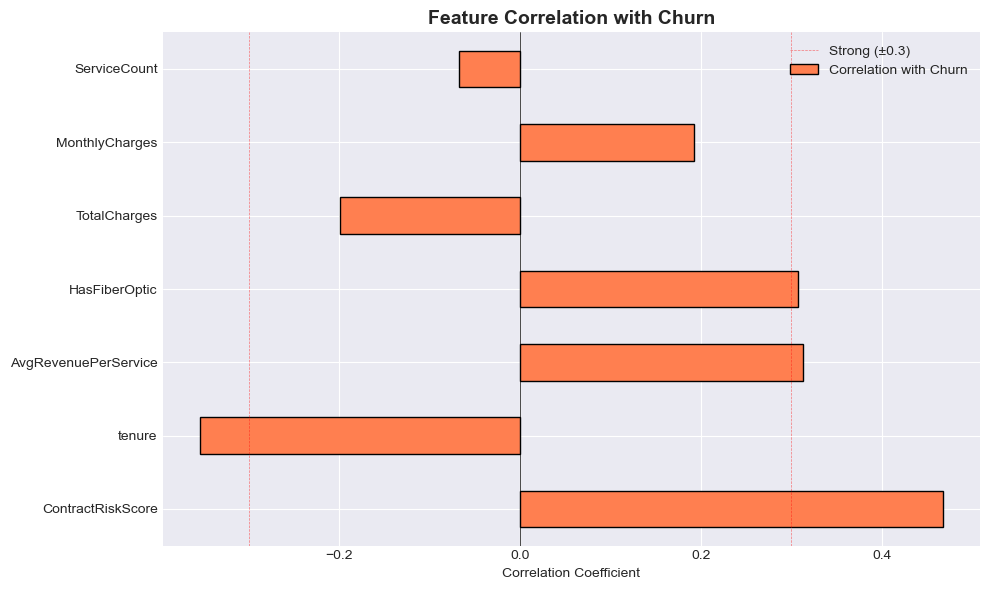


✅ FEATURE ENGINEERING COMPLETE!


In [67]:
print("\n" + "="*80)
print("FEATURE VALIDATION - DO THESE FEATURES PREDICT CHURN?")
print("="*80)

# Check correlations with churn
churn_numeric = df_clean['Churn'].map({'Yes': 1, 'No': 0})

feature_correlations = {
    'tenure': df_clean['tenure'].corr(churn_numeric),
    'MonthlyCharges': df_clean['MonthlyCharges'].corr(churn_numeric),
    'TotalCharges': df_clean['TotalCharges'].corr(churn_numeric),
    'ServiceCount': df_clean['ServiceCount'].corr(churn_numeric),
    'ContractRiskScore': df_clean['ContractRiskScore'].corr(churn_numeric),
    'HasFiberOptic': df_clean['HasFiberOptic'].corr(churn_numeric),
    'AvgRevenuePerService': df_clean['AvgRevenuePerService'].corr(churn_numeric)
}

correlations_df = pd.DataFrame.from_dict(
    feature_correlations, orient='index', columns=['Correlation with Churn']
).sort_values('Correlation with Churn', key=abs, ascending=False)

print("\nFeature Correlations with Churn (sorted by strength):")
print(correlations_df)

print("\n💡 INTERPRETATION:")
print("   Positive correlation = Higher value → Higher churn")
print("   Negative correlation = Higher value → Lower churn")
print("   |r| > 0.3 = Strong predictor")
print("   |r| > 0.5 = Very strong predictor")

# Visualize top features
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(10, 6))
correlations_df.plot(kind='barh', ax=ax, color='coral', edgecolor='black')
ax.set_title('Feature Correlation with Churn', fontsize=14, fontweight='bold')
ax.set_xlabel('Correlation Coefficient')
ax.axvline(0, color='black', linestyle='-', linewidth=0.5)
ax.axvline(0.3, color='red', linestyle='--', linewidth=0.5, alpha=0.5, label='Strong (±0.3)')
ax.axvline(-0.3, color='red', linestyle='--', linewidth=0.5, alpha=0.5)
ax.legend()
plt.tight_layout()
plt.show()

print("\n✅ FEATURE ENGINEERING COMPLETE!")

SERVICE COUNT vs CHURN - THE FULL STORY

Churn rate by service count:
ServiceCount
0    43.750000
1    21.154979
2    32.883642
3    36.476684
4    31.378936
5    25.607064
6    22.551929
7    12.405063
8     5.288462
Name: Churn, dtype: float64

Detailed breakdown:
              Churn Rate (%)  Customer Count  Avg Monthly Charge  Avg Tenure
ServiceCount                                                                
0                      43.75              80               24.90        8.89
1                      21.15            1697               30.10       21.00
2                      32.88            1186               51.17       24.38
3                      36.48             965               69.36       24.49
4                      31.38             921               78.76       32.09
5                      25.61             906               86.37       41.54
6                      22.55             674               93.69       51.20
7                      12.41            

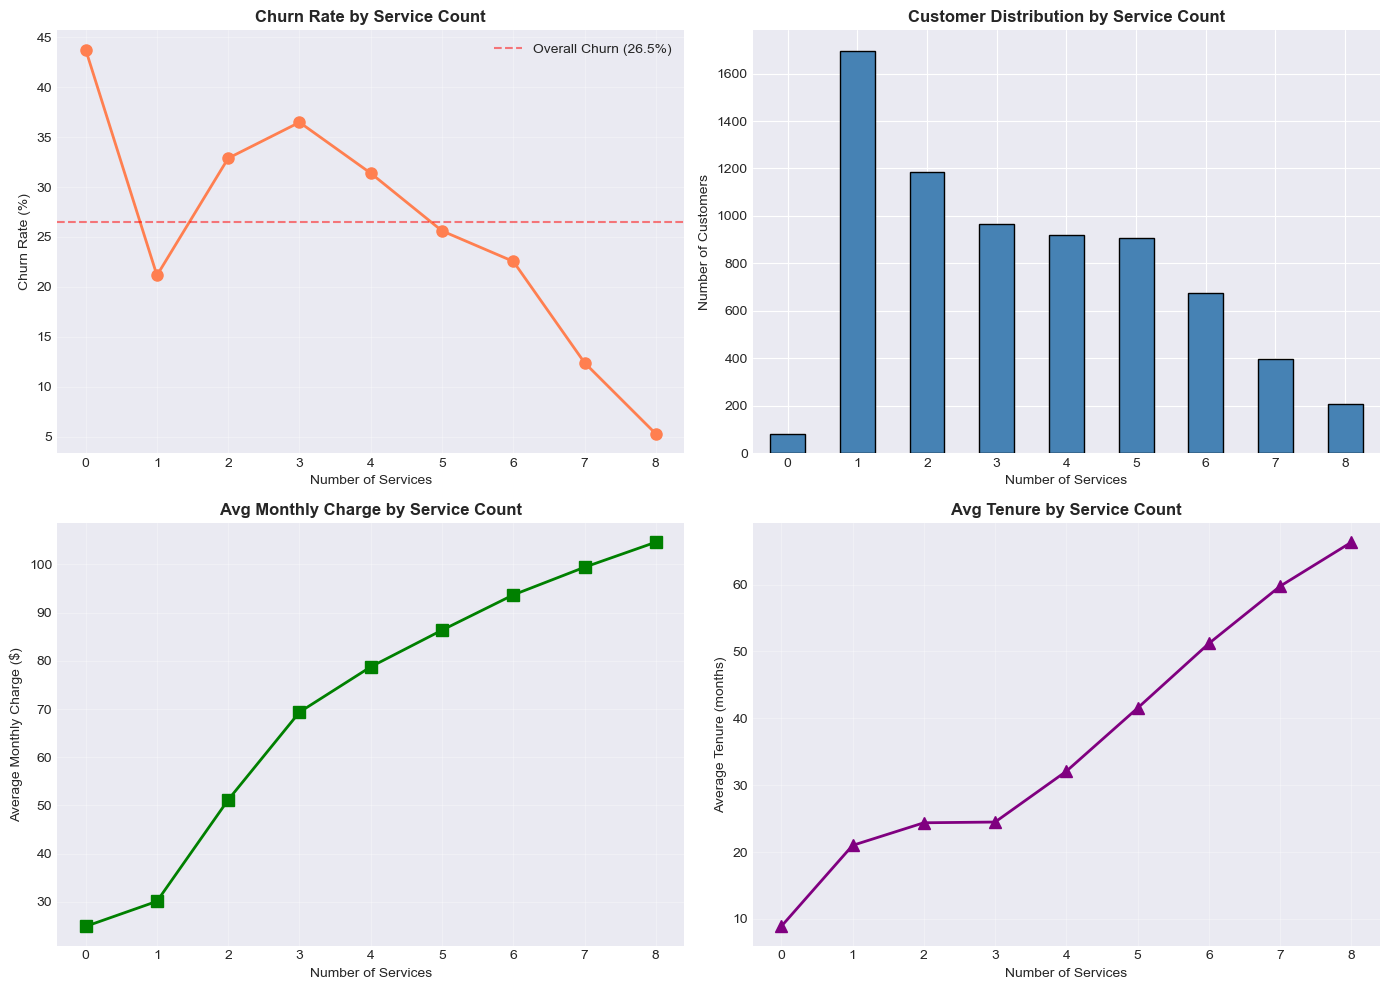


💡 KEY PATTERNS TO LOOK FOR:
   1. Is there a U-shape? (0 and 8 services have different churn than middle?)
   2. What's the 'sweet spot' - lowest churn service count?
   3. Do power users (6-8 services) churn more despite paying more?


In [69]:
print("="*80)
print("SERVICE COUNT vs CHURN - THE FULL STORY")
print("="*80)

# Churn rate by service count
service_churn = df_clean.groupby('ServiceCount')['Churn'].apply(
    lambda x: (x == 'Yes').mean() * 100
).sort_index()

print("\nChurn rate by service count:")
print(service_churn)

# Create a detailed view
service_analysis = df_clean.groupby('ServiceCount').agg({
    'Churn': lambda x: (x == 'Yes').mean() * 100,
    'customerID': 'count',
    'MonthlyCharges': 'mean',
    'tenure': 'mean'
}).round(2)

service_analysis.columns = ['Churn Rate (%)', 'Customer Count', 'Avg Monthly Charge', 'Avg Tenure']
print("\nDetailed breakdown:")
print(service_analysis)

# Visualize
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Churn rate by service count
axes[0,0].plot(service_churn.index, service_churn.values, marker='o', linewidth=2, markersize=8, color='coral')
axes[0,0].set_title('Churn Rate by Service Count', fontsize=12, fontweight='bold')
axes[0,0].set_xlabel('Number of Services')
axes[0,0].set_ylabel('Churn Rate (%)')
axes[0,0].grid(True, alpha=0.3)
axes[0,0].axhline(y=26.5, color='red', linestyle='--', alpha=0.5, label='Overall Churn (26.5%)')
axes[0,0].legend()

# Plot 2: Customer distribution by service count
service_analysis['Customer Count'].plot(kind='bar', ax=axes[0,1], color='steelblue', edgecolor='black')
axes[0,1].set_title('Customer Distribution by Service Count', fontsize=12, fontweight='bold')
axes[0,1].set_xlabel('Number of Services')
axes[0,1].set_ylabel('Number of Customers')
axes[0,1].set_xticklabels(axes[0,1].get_xticklabels(), rotation=0)

# Plot 3: Average monthly charge by service count
axes[1,0].plot(service_analysis.index, service_analysis['Avg Monthly Charge'], 
               marker='s', linewidth=2, markersize=8, color='green')
axes[1,0].set_title('Avg Monthly Charge by Service Count', fontsize=12, fontweight='bold')
axes[1,0].set_xlabel('Number of Services')
axes[1,0].set_ylabel('Average Monthly Charge ($)')
axes[1,0].grid(True, alpha=0.3)

# Plot 4: Average tenure by service count
axes[1,1].plot(service_analysis.index, service_analysis['Avg Tenure'], 
               marker='^', linewidth=2, markersize=8, color='purple')
axes[1,1].set_title('Avg Tenure by Service Count', fontsize=12, fontweight='bold')
axes[1,1].set_xlabel('Number of Services')
axes[1,1].set_ylabel('Average Tenure (months)')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n💡 KEY PATTERNS TO LOOK FOR:")
print("   1. Is there a U-shape? (0 and 8 services have different churn than middle?)")
print("   2. What's the 'sweet spot' - lowest churn service count?")
print("   3. Do power users (6-8 services) churn more despite paying more?")

In [71]:
# Create a new feature: Service Adoption Rate
df_clean['ServiceAdoptionRate'] = df_clean['ServiceCount'] / (df_clean['tenure'] + 1)

# High adoption rate = Adding services quickly (engaged)
# Low adoption rate = Stuck at 1-2 services (at risk)

In [73]:
print("\n" + "="*80)
print("FEATURE 7: SERVICE ADOPTION RATE")
print("="*80)

# Create service adoption rate (services per month of tenure)
# Add 1 to tenure to avoid division by zero
df_clean['ServiceAdoptionRate'] = df_clean['ServiceCount'] / (df_clean['tenure'] + 1)

print("Service adoption rate statistics:")
print(df_clean['ServiceAdoptionRate'].describe())

print("\nChurn correlation:")
churn_numeric = df_clean['Churn'].map({'Yes': 1, 'No': 0})
adoption_corr = df_clean['ServiceAdoptionRate'].corr(churn_numeric)
print(f"Correlation with churn: {adoption_corr:.3f}")

# Segment by adoption rate
df_clean['AdoptionSegment'] = pd.cut(
    df_clean['ServiceAdoptionRate'], 
    bins=[0, 0.05, 0.15, 0.30, 1.0],
    labels=['Slow', 'Moderate', 'Fast', 'Very Fast']
)

print("\nChurn rate by adoption segment:")
adoption_churn = df_clean.groupby('AdoptionSegment')['Churn'].apply(
    lambda x: (x == 'Yes').mean() * 100
)
print(adoption_churn)

print("\n💡 HYPOTHESIS:")
print("   Fast adopters (adding services quickly) = engaged = lower churn")
print("   Slow adopters (stuck at 1-2 services) = at risk = higher churn")


FEATURE 7: SERVICE ADOPTION RATE
Service adoption rate statistics:
count    7032.000000
mean        0.222891
std         0.294081
min         0.000000
25%         0.071429
50%         0.111111
75%         0.250000
max         3.000000
Name: ServiceAdoptionRate, dtype: float64

Churn correlation:
Correlation with churn: 0.356

Churn rate by adoption segment:
AdoptionSegment
Slow          4.840183
Moderate     17.231897
Fast         34.657040
Very Fast    54.843517
Name: Churn, dtype: float64

💡 HYPOTHESIS:
   Fast adopters (adding services quickly) = engaged = lower churn
   Slow adopters (stuck at 1-2 services) = at risk = higher churn


In [75]:
print("="*80)
print("DEEP DIVE: ADOPTION RATE × TENURE")
print("="*80)

# Let's see what tenure looks like for each adoption segment
print("\nAverage tenure by adoption segment:")
tenure_by_adoption = df_clean.groupby('AdoptionSegment')['tenure'].agg(['mean', 'median', 'count'])
print(tenure_by_adoption)

print("\nAverage monthly charges by adoption segment:")
charges_by_adoption = df_clean.groupby('AdoptionSegment')['MonthlyCharges'].mean()
print(charges_by_adoption)

print("\nContract type breakdown by adoption segment:")
contract_by_adoption = pd.crosstab(
    df_clean['AdoptionSegment'], 
    df_clean['Contract'], 
    normalize='index'
) * 100
print(contract_by_adoption.round(1))

print("\n" + "="*80)
print("THE TRUTH:")
print("="*80)
print("If 'Very Fast' adopters have LOW tenure → They're new customers churning fast")
print("If 'Slow' adopters have HIGH tenure → They're loyal customers who stabilized")

DEEP DIVE: ADOPTION RATE × TENURE

Average tenure by adoption segment:
                      mean  median  count
AdoptionSegment                          
Slow             49.261187    50.0   1095
Moderate         45.457073    49.0   3273
Fast             17.165162    16.0   1108
Very Fast         3.979881     2.0   1342

Average monthly charges by adoption segment:
AdoptionSegment
Slow         29.259361
Moderate     75.195600
Fast         72.406588
Very Fast    62.638301
Name: MonthlyCharges, dtype: float64

Contract type breakdown by adoption segment:
Contract         Month-to-month  One year  Two year
AdoptionSegment                                    
Slow                       20.0      27.2      52.8
Moderate                   39.9      28.6      31.4
Fast                       78.2      16.6       5.2
Very Fast                  95.2       3.4       1.3

THE TRUTH:
If 'Very Fast' adopters have LOW tenure → They're new customers churning fast
If 'Slow' adopters have HIGH tenure → 

AGE × SERVICE ADOPTION - MARKETING SEGMENTATION

1. DISTRIBUTION: What % of each age group falls into each adoption segment?
--------------------------------------------------------------------------------

Percentage distribution within each age group:
AdoptionSegment  Slow  Moderate  Fast  Very Fast
Non-Senior       17.6      46.9  15.7       19.8
Senior            8.3      53.5  19.1       19.1

💡 INTERPRETATION:
   If Seniors are 60%+ in 'Slow' → They're cautious, low-risk
   If Seniors are 30%+ in 'Very Fast' → They're getting oversold, high-risk

2. COMPOSITION: What % of each adoption segment is seniors?
--------------------------------------------------------------------------------
                 Non-Senior  Senior
AdoptionSegment                    
Slow                   91.7     8.3
Moderate               82.0    18.0
Fast                   81.0    19.0
Very Fast              84.4    15.6

💡 INTERPRETATION:
   If 'Very Fast' segment is 40%+ seniors → They're the problem
 

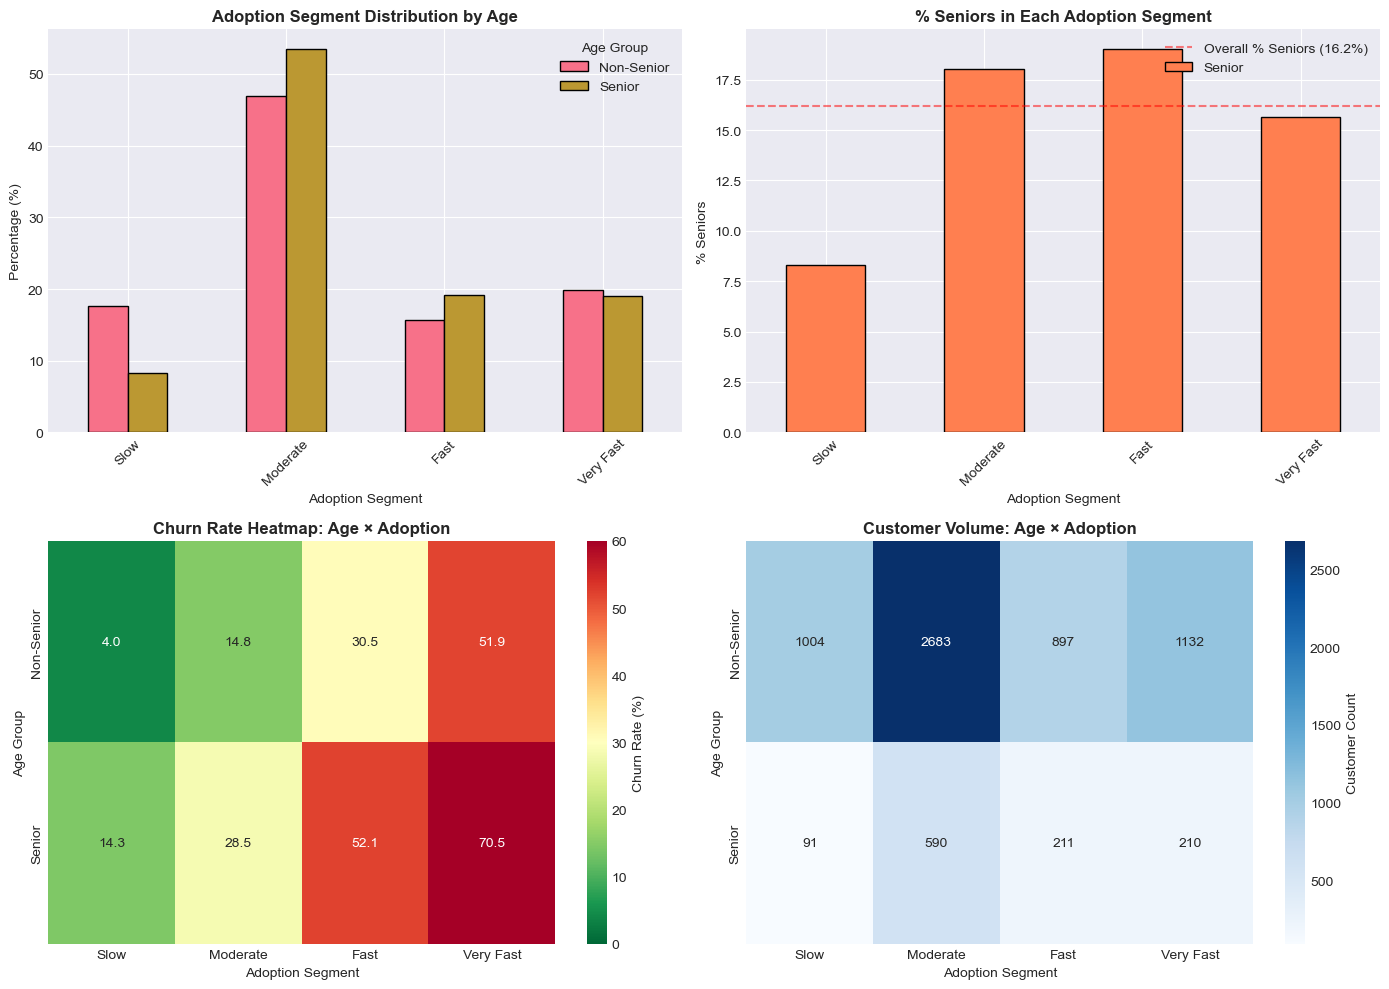


5. REVENUE: Average monthly charges by segment
--------------------------------------------------------------------------------

Average monthly charges:
AdoptionSegment   Slow  Moderate   Fast  Very Fast
SeniorCitizen                                     
0                27.81     72.84  69.47      60.30
1                45.30     85.92  84.88      75.25

💰 INSIGHT:
   High churn + High revenue = Leaving money on the table


In [77]:
print("="*80)
print("AGE × SERVICE ADOPTION - MARKETING SEGMENTATION")
print("="*80)

# Cross-tabulation: Age vs Adoption Segment
print("\n1. DISTRIBUTION: What % of each age group falls into each adoption segment?")
print("-" * 80)

age_adoption_dist = pd.crosstab(
    df_clean['SeniorCitizen'], 
    df_clean['AdoptionSegment'], 
    normalize='index'  # Normalize by row (age group)
) * 100

age_adoption_dist.index = ['Non-Senior', 'Senior']
print("\nPercentage distribution within each age group:")
print(age_adoption_dist.round(1))

print("\n💡 INTERPRETATION:")
print("   If Seniors are 60%+ in 'Slow' → They're cautious, low-risk")
print("   If Seniors are 30%+ in 'Very Fast' → They're getting oversold, high-risk")

# Reverse view: Composition
print("\n" + "="*80)
print("2. COMPOSITION: What % of each adoption segment is seniors?")
print("-" * 80)

age_adoption_comp = pd.crosstab(
    df_clean['AdoptionSegment'],
    df_clean['SeniorCitizen'], 
    normalize='index'
) * 100

age_adoption_comp.columns = ['Non-Senior', 'Senior']
print(age_adoption_comp.round(1))

print("\n💡 INTERPRETATION:")
print("   If 'Very Fast' segment is 40%+ seniors → They're the problem")
print("   If 'Very Fast' segment is <20% seniors → Young people are the experimenters")

# Churn rate by AGE × ADOPTION segment
print("\n" + "="*80)
print("3. CHURN RATES: Age × Adoption (The Money Matrix)")
print("-" * 80)

churn_matrix = df_clean.groupby(['SeniorCitizen', 'AdoptionSegment'])['Churn'].apply(
    lambda x: (x == 'Yes').mean() * 100
).round(1)

print("\nChurn rate by Senior Status × Adoption Segment:")
print(churn_matrix.unstack(fill_value=0))

print("\n🎯 FIND THE HIGHEST-RISK CELL:")
print("   This is your #1 marketing intervention target")

# Customer counts in each segment
print("\n" + "="*80)
print("4. VOLUME: How many customers in each segment?")
print("-" * 80)

volume_matrix = pd.crosstab(
    df_clean['SeniorCitizen'],
    df_clean['AdoptionSegment']
)
volume_matrix.index = ['Non-Senior', 'Senior']
print(volume_matrix)

print("\n💡 BUSINESS PRIORITIZATION:")
print("   High churn % + High volume = Top priority")
print("   High churn % + Low volume = Monitor but don't over-invest")

# Visualize the key finding
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Distribution within age groups
age_adoption_dist.T.plot(kind='bar', ax=axes[0,0], edgecolor='black')
axes[0,0].set_title('Adoption Segment Distribution by Age', fontsize=12, fontweight='bold')
axes[0,0].set_xlabel('Adoption Segment')
axes[0,0].set_ylabel('Percentage (%)')
axes[0,0].legend(title='Age Group')
axes[0,0].set_xticklabels(axes[0,0].get_xticklabels(), rotation=45)

# Plot 2: Composition - % seniors in each segment
age_adoption_comp['Senior'].plot(kind='bar', ax=axes[0,1], color='coral', edgecolor='black')
axes[0,1].set_title('% Seniors in Each Adoption Segment', fontsize=12, fontweight='bold')
axes[0,1].set_xlabel('Adoption Segment')
axes[0,1].set_ylabel('% Seniors')
axes[0,1].axhline(y=16.2, color='red', linestyle='--', alpha=0.5, label='Overall % Seniors (16.2%)')
axes[0,1].legend()
axes[0,1].set_xticklabels(axes[0,1].get_xticklabels(), rotation=45)

# Plot 3: Churn heatmap
churn_pivot = churn_matrix.unstack(fill_value=0)
churn_pivot.index = ['Non-Senior', 'Senior']
sns.heatmap(churn_pivot, annot=True, fmt='.1f', cmap='RdYlGn_r', ax=axes[1,0], 
            cbar_kws={'label': 'Churn Rate (%)'}, vmin=0, vmax=60)
axes[1,0].set_title('Churn Rate Heatmap: Age × Adoption', fontsize=12, fontweight='bold')
axes[1,0].set_xlabel('Adoption Segment')
axes[1,0].set_ylabel('Age Group')

# Plot 4: Volume heatmap
sns.heatmap(volume_matrix, annot=True, fmt='d', cmap='Blues', ax=axes[1,1],
            cbar_kws={'label': 'Customer Count'})
axes[1,1].set_title('Customer Volume: Age × Adoption', fontsize=12, fontweight='bold')
axes[1,1].set_xlabel('Adoption Segment')
axes[1,1].set_ylabel('Age Group')

plt.tight_layout()
plt.show()

# BONUS: Average monthly charges by Age × Adoption
print("\n" + "="*80)
print("5. REVENUE: Average monthly charges by segment")
print("-" * 80)

revenue_matrix = df_clean.groupby(['SeniorCitizen', 'AdoptionSegment'])['MonthlyCharges'].mean().round(2)
print("\nAverage monthly charges:")
print(revenue_matrix.unstack(fill_value=0))

print("\n💰 INSIGHT:")
print("   High churn + High revenue = Leaving money on the table")

In [79]:
# Save the COMPLETE engineered dataset
df_clean.to_csv('C:/Users/nikhi/OneDrive/Desktop/Python/Data Analysis Projects/telco_churn_engineered.csv', index=False)

# Verify all features are there
print("Columns in saved file:")
print(df_clean.columns.tolist())

Columns in saved file:
['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'TenureBucket', 'ServiceCount', 'ChargeCategory', 'ContractRiskScore', 'HasFiberOptic', 'AvgRevenuePerService', 'ServiceAdoptionRate', 'AdoptionSegment']
